In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [43]:
df = pd.read_csv('patents_cleaned.csv')
df = df[['patent_kind', 'patent_type', 'patent_year', 'patent_firstnamed_assignee_country']]
df['transaction'] = df.apply(lambda x: [str(x['patent_kind']), str(x['patent_type']),
                                                                  str(x['patent_year']), str(x['patent_firstnamed_assignee_country'])], axis=1)

transactions = df['transaction'].tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

/var/folders/8t/3j3yl_2s76g5gzxl2vc43hyh0000gn/T/ipykernel_56580/578252713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions['transaction'] = df_transactions.apply(lambda x: [str(x['patent_kind']), str(x['patent_type']),


In [44]:
top_support = rules.nlargest(15, 'support')
rules['support'] = pd.to_numeric(rules['support'], errors='coerce')

print("Top 15 Rules by Support:")
print(top_support)

Top 15 Rules by Support:
         antecedents      consequents  antecedent support  consequent support  \
44         (utility)             (B2)            0.999854            0.812982   
45              (B2)        (utility)            0.812982            0.999854   
216         (B2, US)        (utility)            0.614612            0.999854   
217        (utility)         (B2, US)            0.999854            0.614612   
20            (2023)        (utility)            0.303449            0.999854   
21         (utility)           (2023)            0.999854            0.303449   
18            (2023)             (B2)            0.303449            0.812982   
19              (B2)           (2023)            0.812982            0.303449   
144  (2023, utility)             (B2)            0.303449            0.812982   
145       (2023, B2)        (utility)            0.257896            0.999854   
146    (utility, B2)           (2023)            0.812982            0.303449   
147

In [45]:
top_confidence = rules.nlargest(15, 'confidence')
rules['confidence'] = pd.to_numeric(rules['confidence'], errors='coerce')

print("\nTop 15 Rules by Confidence:")
print(top_confidence)


Top 15 Rules by Confidence:
   antecedents consequents  antecedent support  consequent support   support  \
3       (2019)   (utility)            0.070878            0.999854  0.070878   
7       (2020)   (utility)            0.120070            0.999854  0.120070   
12      (2021)   (utility)            0.160530            0.999854  0.160530   
17      (2022)   (utility)            0.243196            0.999854  0.243196   
20      (2023)   (utility)            0.303449            0.999854  0.303449   
27      (2024)   (utility)            0.076554            0.999854  0.076554   
31        (B1)   (utility)            0.186872            0.999854  0.186872   
45        (B2)   (utility)            0.812982            0.999854  0.812982   
46        (CA)   (utility)            0.014554            0.999854  0.014554   
49        (DE)   (utility)            0.033037            0.999854  0.033037   
50        (IE)   (utility)            0.017901            0.999854  0.017901   
52        (

In [46]:
top_lift = rules.nlargest(15, 'lift')
rules['lift'] = pd.to_numeric(rules['lift'], errors='coerce')

print("\nTop 15 Rules by Lift:")
print(top_lift)


Top 15 Rules by Lift:
             antecedents          consequents  antecedent support  \
62            (2019, US)                 (B1)            0.055159   
63                  (B1)           (2019, US)            0.186872   
222  (utility, 2019, US)                 (B1)            0.055159   
224        (utility, B1)           (2019, US)            0.186872   
229           (2019, US)        (utility, B1)            0.055159   
231                 (B1)  (utility, 2019, US)            0.186872   
61              (B1, US)               (2019)            0.168098   
64                (2019)             (B1, US)            0.070878   
221    (utility, B1, US)               (2019)            0.168098   
225      (utility, 2019)             (B1, US)            0.070878   
228             (B1, US)      (utility, 2019)            0.168098   
232               (2019)    (utility, B1, US)            0.070878   
0                   (B1)               (2019)            0.186872   
1          

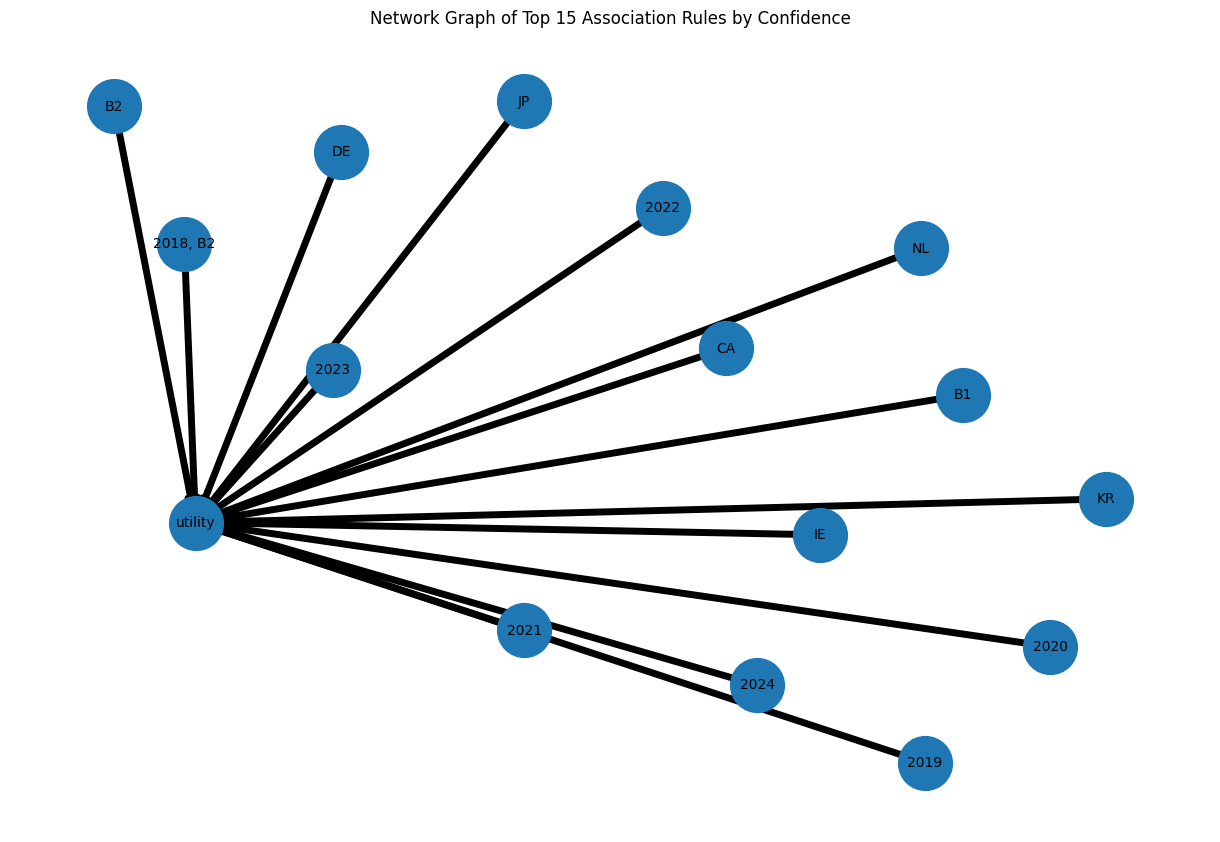

In [51]:
plt.figure(figsize=(12, 8))
G = nx.DiGraph()

for _, row in top_confidence.iterrows():
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))
    G.add_node(antecedent)
    G.add_node(consequent)
    G.add_edge(antecedent, consequent, weight=row['confidence'])

pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=10, arrows=True)

edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] * 5 for (u, v, d) in edges])

plt.title('Network Graph of Top 15 Association Rules by Confidence')
plt.show()

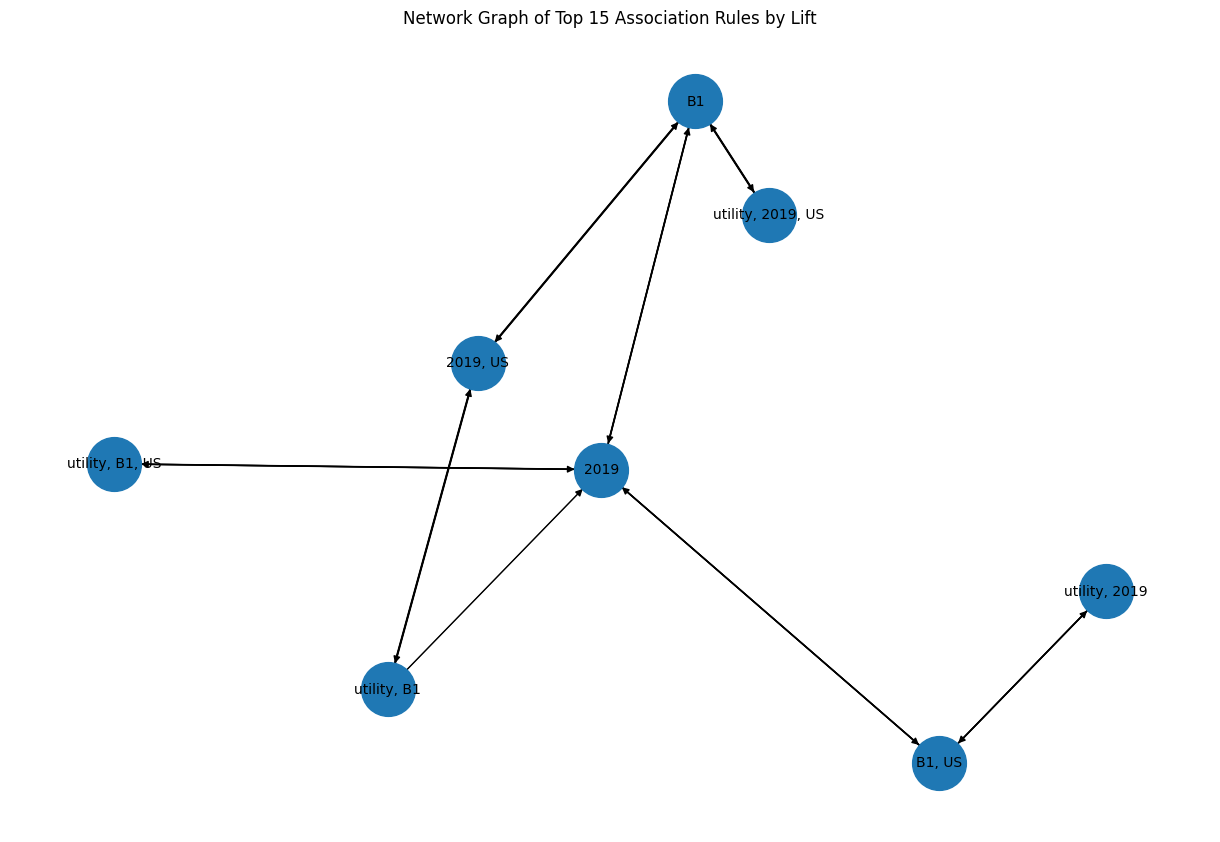

In [55]:
plt.figure(figsize=(12, 8))
G = nx.DiGraph()

for _, row in top_lift.iterrows():
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))
    G.add_node(antecedent)
    G.add_node(consequent)
    G.add_edge(antecedent, consequent, weight=row['confidence'])

pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=10, arrows=True)

edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] * 5 for (u, v, d) in edges])

plt.title('Network Graph of Top 15 Association Rules by Lift')
plt.show()

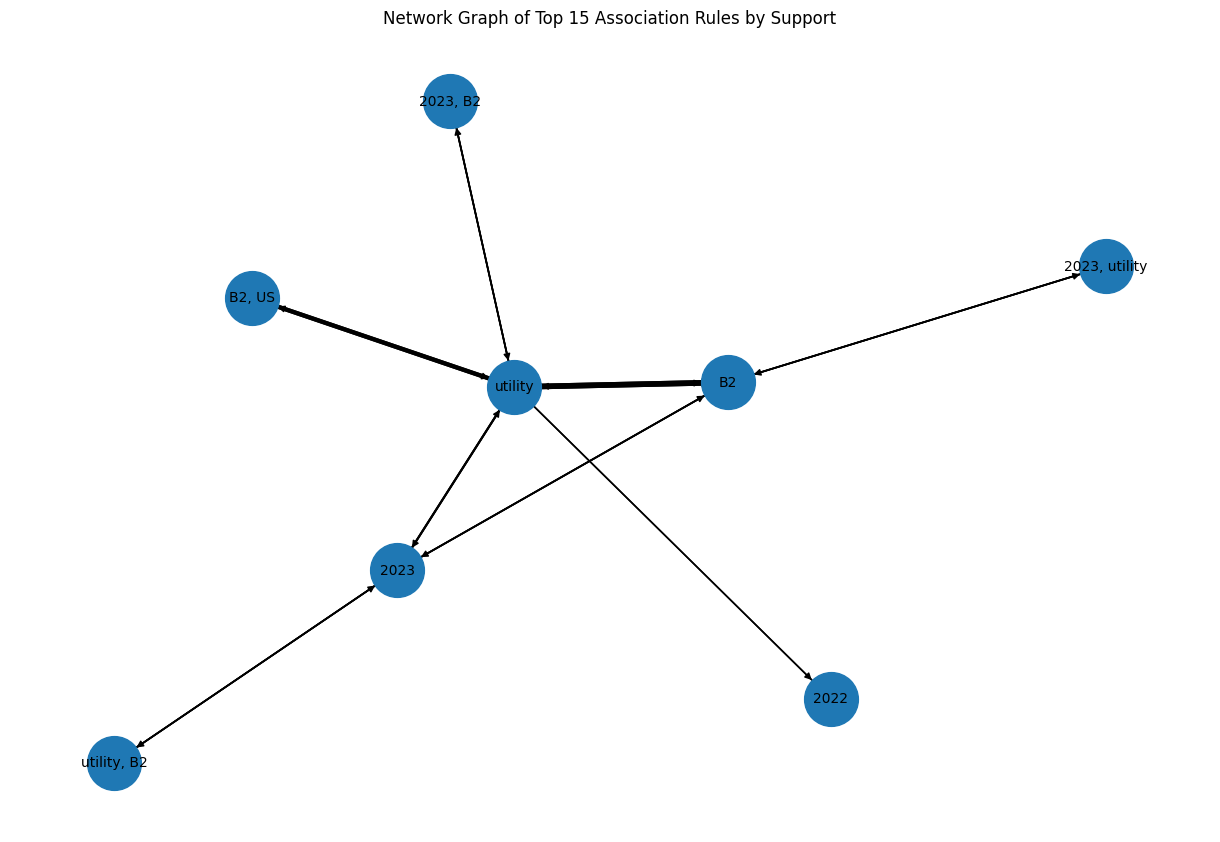

In [54]:
plt.figure(figsize=(12, 8))
G = nx.DiGraph()

for _, row in top_support.iterrows():
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))
    G.add_node(antecedent)
    G.add_node(consequent)
    G.add_edge(antecedent, consequent, weight=row['support'])

pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=10, arrows=True)

edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] * 5 for (u, v, d) in edges])

plt.title('Network Graph of Top 15 Association Rules by Support')
plt.show()